### Recordatori de Python

#### Enumerate

In [1]:
for a,b in enumerate(['a','b','c']):
    print(a,b)

0 a
1 b
2 c


#### zip

In [2]:
for i in zip([1,2,3],[3,4,5,6]):
    print(i)

(1, 3)
(2, 4)
(3, 5)


#### \*args, \*kwargs o com definir una funció amb un nombre d'arguments arbitrari.

In [3]:
def magic(*args, **kwargs):
    print(args)
    print(kwargs)
    
magic(1,2,3, val1='a', val2='b')

(1, 2, 3)
{'val1': 'a', 'val2': 'b'}


In [4]:
def magic(*a, **b):
    print(a)
    print(b)
    
magic(1,2,3, val1='a', val2='b')

(1, 2, 3)
{'val1': 'a', 'val2': 'b'}


`*args` i `**kwargs` ens permeten passar un nombre variable de paràmetres a una funció.

In [5]:
def suma(*args):
    s = 0
    for i in args:
        s += i
    print("La suma és", s)
    

a = (1,2,3,4)

print(suma(*a))

La suma és 10
None


In [6]:
def my_func(**kwargs):
    for i, j in kwargs.items():
        print(i, j)
        
my_func(name='tim', sport='football', roll=19)

name tim
sport football
roll 19


# Optimització i aprenentatge de dades

Què volem dir quan diem que "aprenem de les dades"?

> En general **aprendre de les dades** vol dir inferir (construir de baix cap a dalt, de les dades cap el model) un model que ens permet representar-les de forma compacte i ens permet generalitzar el seu comportament (extrapolar).

Una gran part dels algorismes que "aprenen" de les dades estan basats en la resolució (iterativa) d'un problema matemàtic que inclou el model i les dades. 

Si existís una solució analítica que derivés la fòrmula de la solució, adopatariem aquesta estratègia, però no és el cas.

La forma més comú que prenen les estratègies per "aprendre" de les dades és la resolució de sistemes d'equacions com a mitjà per determinar una sèrie de paràmetres que minimitzen una funció. Això rep el nom d'**optimització**.

La metodologia crítica per resoldre problemes d'optimització és el **descens del gradient**.

### Descens del gradient (per *hackers*)

Suposem que tenim una funcio $f$ que té per argument un vector de nombres reals i que té com a sortida un únic nombre real. Per exemple:

In [7]:
def suma_de_quadrats(v):
    return sum([v_i ** 2 for v_i in v]) 

suma_de_quadrats([2,2,2])

12

Una versió d'aquesta funció, que s'anomena **funció de cost** i que veurem una mica més endavant, és troba en molts problemes d'aprenentatge. L'objectiu és calcular la $\mathbf{v}$ que maximitza (o minimitza) aquesta funció, o el que és el mateix, la $\mathbf{v}$ que produeix el valor més alt possible de $f$. El terme $\mathbf{v}$ sol representar la discrepància entre el model i les dades.

### De les derivades al gradient

Si $f$ és una funció d'una sola variable, la derivada a un punt $x$ mesura la variació de la funció quan fem un petit canvi a la $x$, i es defineix com el límit de la diferència de dos quocients: 

$$ \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} $$

In [8]:
def quadrat(x):
    return x*x

def dif_quo(x, f=quadrat, h=1e-6):
    return (f(x+h) - f(x))/h

dif_quo(3.0, quadrat)

6.000001000927568

La derivada es defineix com la pendent de la tangent a $(x,f(x))$, concepte que s'iguala a la diferència de quocients quan la $h$ tendeix a 0, però per altres $h$ la diferència de quocients no deixa de ser una aproximació a la pendent de la tangent a $((x+h), f(x+h))$.  

<function matplotlib.pyplot.show(*args, **kw)>

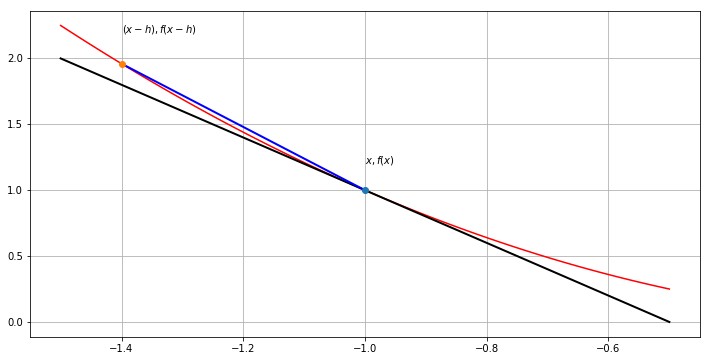

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(-1.5,-0.5, 100)
f = [i**2 for i in x]
plt.plot(x,f, 'r-')
plt.plot([-1.5, -0.5], [2, 0.0], 'k-', lw=2)
plt.plot([-1.4, -1.0], [1.96, 1.0], 'b-', lw=2)
plt.plot([-1],[1],'o')
plt.plot([-1.4],[1.96],'o')
plt.text(-1.0, 1.2, r'$x,f(x)$')
plt.text(-1.4, 2.2, r'$(x-h),f(x-h)$')
plt.gcf().set_size_inches((12,6))
plt.grid()
plt.show

Hi ha moltes funcions de les quals poden calcular la derivada analíticament, com per exemple $x^2$:

In [10]:
def d_a_quadrat(x):
    # la derivada de x**2 és 2*x
    return 2*x

d_a_quadrat(1.0)

2.0

<function matplotlib.pyplot.show(*args, **kw)>

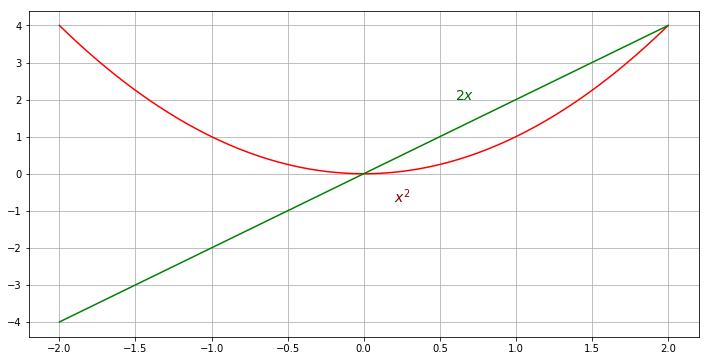

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

font1 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

font2 = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 14,
        }

x = np.linspace(-2,2, 100)
f = [i**2 for i in x]
df = [2*i for i in x]
plt.text(0.2, -0.8, r'$x^2$', fontdict=font1)
plt.text(0.6, 2.0, r'$2x$', fontdict=font2)
plt.plot(x,f, 'r-')
plt.plot(x,df, 'g-')
plt.gcf().set_size_inches((12,6))
plt.grid()
plt.show

Però que hem de fer quan no tenim una fòrmula analítica per la derivada? Doncs no queda més remei que usar l'aproximació de la diferència de quocients! Si el pas és prou petit no notarem la diferència, tot i que el concepte "prou petit" és una mica indefinit: la funció pot variar molt en qualsevol interval i pot requerir una $h$ diferent per zones diferents.

> Un problema afegir al càlcul de les diferències finites és com manegar els errors d'arrodoniment, els *overflows* i *underflows* dels càlculs, sobre tot quan fem la divisió per $h$.

<function matplotlib.pyplot.show(*args, **kw)>

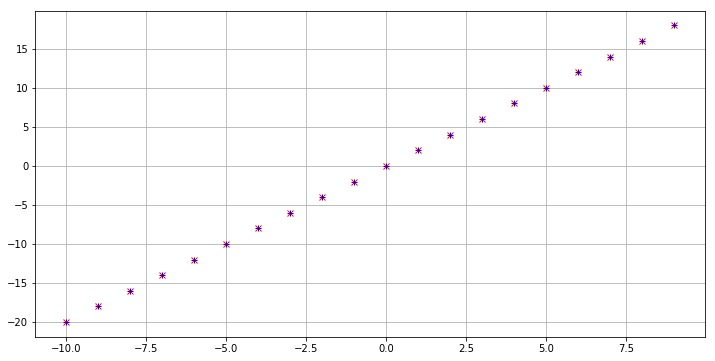

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

x = range(-10,10)
plt.plot(x,list(map(dif_quo,x)), 'rx')
plt.plot(x,list(map(d_a_quadrat,x)), 'b+')
plt.gcf().set_size_inches((12,6))
plt.grid()
plt.show

Quan $f$ és una funció de varies variables, té varies derivades parcials, cada una de les quals indica com varia $f$ quan fem un petit canvi en la variable corresponent. 

La derivada parcial respecte a una variable es pot calcular considerant només canvis en aquella variable i mantenint la resta constants:

In [13]:
def dif_quo_parcial(v, f, i, h=1e-6):
    w = [v_j + (h if j==i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v))/h

El *gradient* de la funció $f$, que és un vector format per les derivades parcials de la funció, ens dóna la direcció en la qual la funció creix més ràpidament. 

$$\nabla {f} = (\frac{\partial f}{\partial v_1}, \dots, \frac{\partial f}{\partial v_n})$$

In [14]:
def gradient(v, f, h=1e-6):
    return[dif_quo_parcial(v,f,i,h) for i,_ in enumerate(v)]

def f(v):
    return sum(v_i**2 for v_i in v)

v = [1,1,1]
print(f(v), gradient(v,f))

3 [2.0000009999243673, 2.0000009999243673, 2.0000009999243673]


Per tant, una possible estratègia per maximitzar (*minimitzar*) una funció és repetir la següent estratègia:

+ Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{v}$)
+ Calcular el vector gradient.
+ Fer un petit pas en la direcció (*contraria*) del vector gradient.

La cerca s'acaba quan no el vector gradient és zero: hem trobat un màxim (*mínim*). 

Si la funció és unimodal (conté un únic màxim (*mínim*)), hem trobat una la nostra solució. Sinó, pot ser que estem en un màxim (*mínim*) local i que sigui una solució no satisfactòria.

La funció que hem avaluat, $f({\mathbf v}) = v_1^2+v_2^2+v_3^2$, val $3$ al punt $(1,1,1)$ i el seu vector gradient en aquest punt és $(2,2,2)$. 

> És important observar que aquesta forma de calcular el gradient és computacionalment costosa: si $\mathbf{v}$ té longitud $n$, hem d'avaluar $f$ a $2n$ punts.

### Com utilitzar el gradient

És fàcil veure que la funció "suma de quadrats", $\sum_i v_i^2$, pren el seu mínim valor quan totes les $v$ són 0. 

Anem a comprovar-ho pel cas de dimensió 3. Per fer-ho, encara ens cal una funció que ens mogui en la direcció contrària del gradient, que anomenarem ``pas``: 

In [15]:
def pas(v,grad,mida_pas):
    return [v_i + mida_pas * dir_i for v_i, dir_i in zip(v,grad)]

def gradient_suma_quadrats(v):
    return [2 * v_i for v_i in v]

Començarem escollint un valor a l'atzar i llavors anirem movent-nos en la direcció contrària al gradient. Ens aturarem quan el canvi en el valor de la funcio sigui prou petit.

In [16]:
import random
import numpy as np

def distancia(v1,v2):
    import numpy as np
    import math
    v = np.array(v1)-np.array(v2)
    return math.sqrt(sum(v_i ** 2 for v_i in v))

v = [random.randint(-10,10) for i in range(3)]
v

[9, 3, 4]

In [17]:
tolerancia = 1e-15
while True:
    gradient = gradient_suma_quadrats(v)
    next_v = pas(v,gradient,-0.01)
    if distancia(next_v,v) < tolerancia:
        break
    v = next_v
print(v)


[4.317158956972162e-14, 1.4390529856573868e-14, 1.9187373142098485e-14]


### El pas

La **mida del pas** és un aspecte delicat: si és massa petita avançarem massa lentament; si és massa gran, podem perdre el màxim (mínim) ques estem buscant. 

Per tant, a l'hora de triar la mida del pas hem de considerar quina política seguir:

+ Fer servir una mida de pas constant. En aquest cas la mida del pas defineix la precisió de la solució.
+ Anar disminuint la mida del pas a mesura que passa el temps.
+ A cada pas, cercar la mida que minimitza el valor de funció objectiu.

La darrera opció és bona però molt cara. El màxim que podriem fer és considerar un conjunt fix de mides.

In [18]:
mides_pas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

Sempre hem de tenir en compte que per alguns passos podem tenir una entrada no vàlida per la funció. Per això crearem una funció que ho manegarà:

In [22]:
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except: 
            return float('inf')
    return safe_f

### Plantejament general d'un problema d'aprenentatge

En general, tenim els següents elements:

+ Un conjunt de dades $(x,y)$. 
+ Una funció objectiu *target_f*, que volem minimitzar, que representa la discrepància entre les dades i un model.
+ La funció que representa el gradient de la funció objectiu, *gradient_f*. 


El cas més normal és que *target_f*  representi els errors d'un model $M$ de representació de les dades $(x_i, y_i)$, en funció dels seus paràmetres $\theta$, i volem trobar els paràmetres que minimitzen l'error:

$$ f = \sum_{i} (y_i - M(x_i,\theta))^2 $$

Per exemple, $(x,y)$ pot representar:

+ $x$: el comportament d'un jugador de "Candy Crush"; $y$: les compres mensuals que fa de "vides". 
+ $x$: les dades de funcionament del motor d'un cotxe; $y$: la probabilitat d'un error de funcionament del motor.
+ $x$: les dades financeres d'un client d'un banc; $y$: la seva qualificació (si/no) per un préstec.

> El cas que $y$ és un valor real, el problema s'anomena *regressió*.

> El cas que $y$ és un valor binari o categòric, el problema s'anomena *classificació*. 

Llavors els descens del gradient es pot implementar així:

In [28]:
# Les dades de la funció y = 2x serien del tipus:
x = [1,2,3,4]
y = [2,4,6,8]

def minimitza_batch(target_f, gradient_f, x, y, theta_inicial, toler = 1e-6):
    
    mides_pas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    theta = theta_inicial
    target_f = safe(target_f)
    valor = target_f(x,y,theta)
    
    while True:
        gradient = gradient_f(theta)
        next_thetas = [pas(theta, gradient, -pas) for mida_pas in mides_pas]
        next_theta = min(next_thetas, key = target_f)
        next_valor = target_f(x,y,next_theta)
        if abs(valor - next_valor) < toler:
            return theta
        else:
            theta, valor = next_theta, next_valor

Aquesta funció avalua a cada pas la funció sencera, és a dir, necessita totes les dades $(x_i,y_i)$. 

**Si el volum de dades és molt gran aquesta estratègia no és viable**. En aquests casos usarem una tècnica coneguda com a SGD (*Stochastic Gradient Descend*).

### Stochastic Gradient Descend

En la majoria de casos la funció d'error que estem avaluant és de tipus additiu: es construeix a partir de la suma dels errors de cada una de les dades respecte del model.

En aquest cas podem usar la tècnica Stochastic Gradient Descend (SGD), que consisteix en calcular el gradient (i fer un pas en la direcció del mínim) a partir de l'estimació d'**una única dada** (o d'un conjunt petit de dades). 

En aquest exemple farem servir un pas adaptatiu: si no observem millora en el valor de la funció anem fent petit el pas.

Durant cada cicle, iterarem sobre les dades en ordre aleatori:

In [32]:
x = [1,2,3,4]
y = [2,4,6,8]
dades = list(zip(x,y))

def in_random_order(dades):
    import random
    indexes = [i for i,_ in enumerate(dades)]
    random.shuffle(indexes)
    for i in indexes:
        yield dades[i]

In [33]:
for (x_i,y_i) in in_random_order(dades):
    print(x_i,y_i) 

2 4
1 2
4 8
3 6


In [18]:
def vector_subtract(v,w):
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def scalar_multiply(c,v):
    return [c * v_i for v_i in v]

def SGD(target_f, gradient_f, x, y, theta_0, alpha_0=0.01):
    dades = zip(x,y)
    theta = theta_0
    alpha = alpha_0
    min_theta, min_valor = float('inf'), float('inf')
    iteracions_sense_millora = 0
    while iteracions_sense_millora < 100:
        valor = sum(target_f(x_i, y_i, theta) for x_i,y_i in dades)
        if valor < min_valor:
            min_theta, min_valor = theta, valor
            iteracions_sense_millora = 0
            alpha = alpha_0
        else:
            iteracions_sense_millora += 1
            alpha *= 0.9
        for x_i, y_i in in_random_order(dades):
            gradient_i = gradient_f(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    return min_theta

## Gradient Descent i Regressió Lineal



El model de regressió lineal assumeix una relació entre les dades i el model d'quest tipus:

$$ y_i = \beta x_i + \alpha $$

In [19]:
import numpy as np
x = np.random.uniform(0,1,20)

def f(x): return x*2

noise_variance =0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

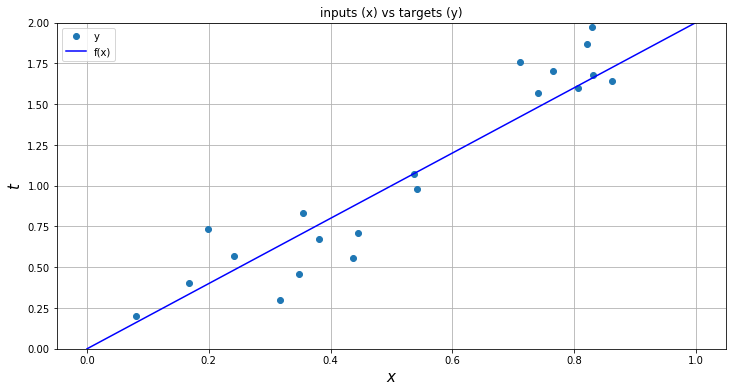

In [20]:
plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((12,6))
plt.show()

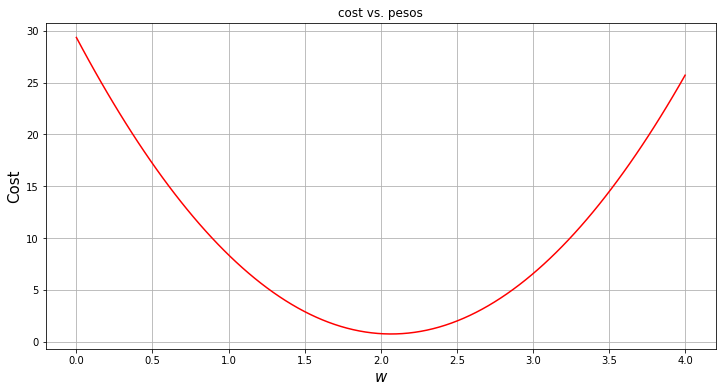

In [21]:
# El nostre model y = x * w
def nn(x, w): return x * w

# Definim la funció de cost
def cost(y, t): return ((t - y)**2).sum()

# Definim un vector de possibles valors d'aquesta funció 
ws = np.linspace(0, 4, num=100)  
cost_ws = np.vectorize(lambda w: cost(nn(x, w) , y))(ws)  

# Plot
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('Cost', fontsize=15)
plt.title('cost vs. pesos')
plt.grid()
plt.gcf().set_size_inches((12,6))
plt.show()

In [22]:
def gradient(w, x, y): 
    return 2 * x * (nn(x, w) - y)

# definim un pas
def delta_w(w_k, x, y, learning_rate):
    return learning_rate * gradient(w_k, x, y).sum()

# valor inicial del pes
w = 0.1

#learning_rate = 0.1
learning_rate = 0.02
#learning_rate = 0.001


nb_of_iterations = 15  
w_cost = [(w, cost(nn(x, w), y))] 
for i in range(nb_of_iterations):
    dw = delta_w(w, x, y, learning_rate)  
    w = w - dw  
    w_cost.append((w, cost(nn(x, w), y)))  

for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

w(0): 0.1000 	 cost: 26.6471
w(1): 0.6266 	 cost: 14.6357
w(2): 1.0123 	 cost: 8.1925
w(3): 1.2948 	 cost: 4.7362
w(4): 1.5017 	 cost: 2.8821
w(5): 1.6533 	 cost: 1.8875
w(6): 1.7643 	 cost: 1.3540
w(7): 1.8455 	 cost: 1.0678
w(8): 1.9051 	 cost: 0.9143
w(9): 1.9487 	 cost: 0.8319
w(10): 1.9806 	 cost: 0.7878
w(11): 2.0040 	 cost: 0.7641
w(12): 2.0211 	 cost: 0.7514
w(13): 2.0337 	 cost: 0.7445
w(14): 2.0429 	 cost: 0.7409
w(15): 2.0496 	 cost: 0.7389


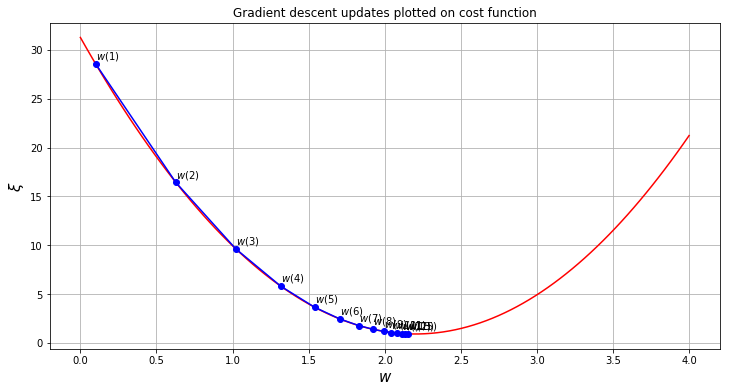

In [27]:
# Plot the first 2 gradient descent updates
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(1, len(w_cost)-2):
    w1, c1 = w_cost[i-1]
    w2, c2 = w_cost[i]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$w({})$'.format(i)) 
# Plot the last weight, axis, and show figure
w1, c1 = w_cost[len(w_cost)-3]
plt.plot(w1, c1, 'bo')
plt.text(w1, c1+0.5, '$w({})$'.format(nb_of_iterations))  
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.gcf().set_size_inches((12,6))
plt.show()

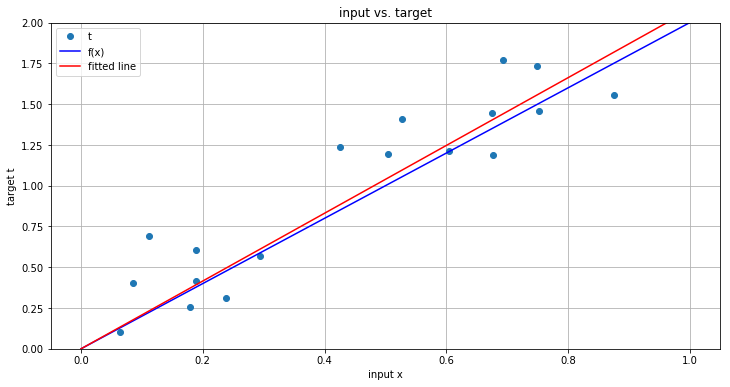

In [28]:
w = 0
nb_of_iterations = 10  
for i in range(nb_of_iterations):
    dw = delta_w(w, x, y, learning_rate)  
    w = w - dw  
    

plt.plot(x, y, 'o', label='t')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.plot([0, 1], [0*w, 1*w], 'r-', label='fitted line')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs. target')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((12,6))
plt.show()

**Exemple**: Climate Change and Sea Ice Extent

> Sea ice area refers to the total area covered by ice, whereas sea ice extent is the area of ocean with at least 15% sea ice, while the volume is the total amount of ice in the Arctic.

> Reliable measurement of sea ice edges began with the satellite era in the late 1970s. Before this time, sea ice area and extent were monitored less precisely by a combination of ships, buoys and aircraft. The data show a long-term negative trend in recent years, attributed to global warming, although there is also a considerable amount of variation from year to year. Some of this variation may be related to effects such as the arctic oscillation, which may itself be related to global warming and some of the variation is essentially random "weather noise".

> *Source: Wikipedia*

In order to check if there is an anomaly in the evolution of sea ice extent during the last years, we can perform the following processing steps:

+ We must read and clean the data from <code>'SeaIce.txt'</code>. This is a ``Tab`` separated file. 
    + Year:	4-digit year
    + mo:	1- or 2-digit month
    + data_type:	Input data set (Goddard/NRTSI-G)
    + region:	Hemisphere that this data covers (N: Northern; S: Southern)
    + extent:	Sea ice extent in millions of square km
    + area:	Sea ice area in millions of square km

+ To compute the anomaly for a given interval of time (month), we can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend) and we subtract it from the mean extend for that interval. This value must be converted to percent difference by dividing it by the 1981-2010 average and then multiplying by 100.

+ This values can be plotted for the entire time series. 
+ We can also compute the trend as a simple linear regression.



In [29]:
import pandas as pd
ice = pd.read_csv('SeaIce.txt',delim_whitespace=True)
ice.shape

(424, 6)

In [30]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 6 columns):
year         424 non-null int64
mo           424 non-null int64
data_type    424 non-null object
region       424 non-null object
extent       424 non-null float64
area         424 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 20.0+ KB


In [32]:
# To compute the anomaly for a given interval of time, 
# we can compute the mean for that interval of time (using the period 1981 through 2010 for 
# the mean extend)

ice.mean()   # Before data cleaning

# Observation: a negative mean?!!

year      1996.000000
mo           6.500000
extent     -35.443066
area       -37.921108
dtype: float64

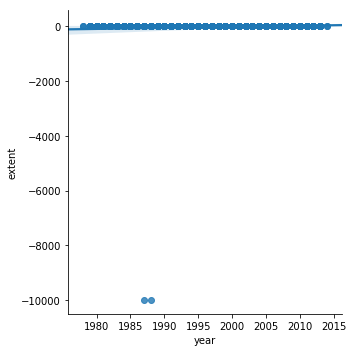

In [33]:
%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt
plt.figure(1, figsize=(8, 6))
sns.lmplot("year", "extent", ice);

In [34]:
np.unique(ice.data_type.values)   # there is a -9999 value!

array(['-9999', 'Goddard', 'NRTSI-G'], dtype=object)

In [35]:
# Let's see what type of data we have more than Goddard and NRTSI-G 
print(ice[(ice.data_type!='Goddard') & (ice.data_type!='NRTSI-G')])

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


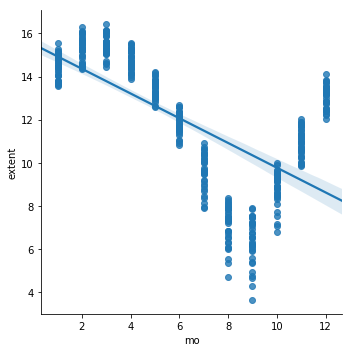

In [36]:
# We can easily clean the data now:
ice2 = ice[ice.data_type != '-9999']
# And repeat the plot
sns.lmplot("mo", "extent", ice2);

In [38]:
print(ice.year.unique().shape)

(37,)


In [39]:
ice2[1:20]

,year,mo,data_type,region,extent,area
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92
5,1984,1,Goddard,N,14.61,11.60
6,1985,1,Goddard,N,14.86,11.60
7,1986,1,Goddard,N,15.02,11.79
8,1987,1,Goddard,N,15.20,11.81
10,1989,1,Goddard,N,15.12,13.11
11,1990,1,Goddard,N,14.95,12.72


In [40]:
ice2.mean()

year      1996.040284
mo           6.500000
extent      11.777583
area         9.287796
dtype: float64

In [41]:
# Compute the mean for each month.
grouped = ice2.groupby('mo')
a = grouped.extent.mean()
a

mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64

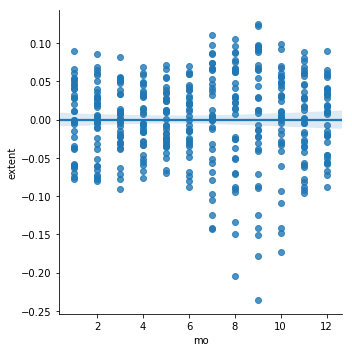

In [42]:
import warnings
warnings.filterwarnings('ignore')
# Data normalization
for j in range(12):
    ice2.extent[ice2.mo==j+1] = (ice2.extent[ice2.mo==j+1] - \
                                 a[j+1])/a.mean()
    
sns.lmplot("mo", "extent", ice2);

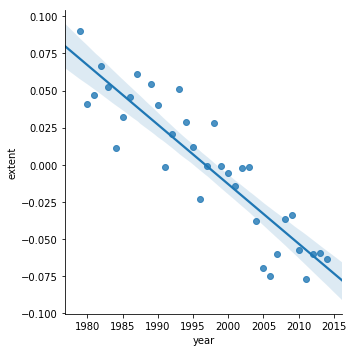

In [43]:
jan = ice2[ice2.mo==1]
sns.lmplot("year", "extent", jan);

In [44]:
import scipy.stats
scipy.stats.pearsonr(jan.year.values, jan.extent.values)

(-0.90575236699277939, 7.520820255851574e-14)

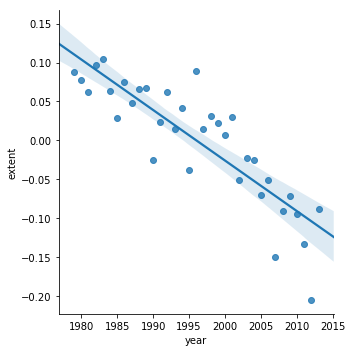

In [45]:
aug = ice2[ice2.mo==8]
sns.lmplot("year", "extent", aug);

In [46]:
scipy.stats.pearsonr(aug.year.values, aug.extent.values)

(-0.86365285650181356, 2.4076977590329208e-11)

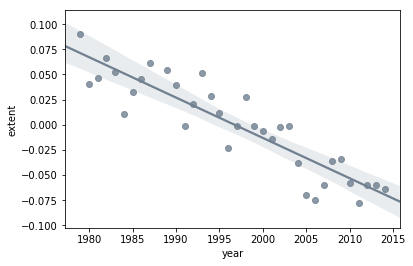

In [47]:
# Confidence interval = 99%.
jan[['year']] = jan[['year']].astype(float)
sns.regplot("year", "extent", jan, ci=99, color="slategray")

mean squared error: 0.000383951607529
R^2: 0.78106360414


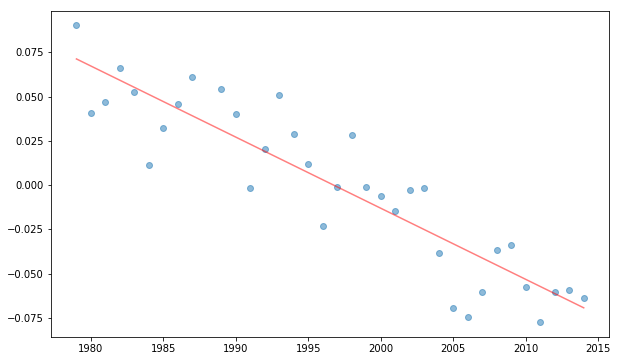

In [48]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

X = jan[['year']]
y = jan[['extent']]

model = LinearRegression()
model.fit(X, y)

y_hat = model.predict(X)

plt.figure(figsize=(10,6))
plt.plot(X, y, 'o', alpha=0.5)
plt.plot(X, y_hat, 'r', alpha=0.5)

print("mean squared error:", metrics.mean_squared_error(y_hat, y))
print("R^2:", metrics.r2_score(model.predict(X), y))

## Exemple: Classificació Lineal 

Donat un vector de nombres reals $\mathbf{x}$, la resposta d'un classificador lineal es calcula com:

$$ y = f \left( \sum_j \omega_j x_j \right)  $$

on $\mathbf{\omega}$ és un vector de valors reals i $f$ és una funció que converteix un escalar en l'etiqueta corresponent (per exemple, el signe: si el resultat és positiu, classe +1, sinó -1). 

Aquest problema es pot resoldre fent SGD sobre la *hinge loss function*: Si hem definit les possibles sortides de la funció com $ y \in \pm 1$ i el classificador ens retorna $\hat{y} = \sum_j \omega_j x_j$, la *hinge loss* de la predicció $\hat{y}$ es defineix com

$$  L(\hat{y}) = max(0,1 - y \hat{y})  $$

Observació: el valor $\hat{y}$ és el valor de sortida del classificador, no l'etiqueta.

Aquesta funció de cost te una propietat interessant: maximitza el *marge* entre els dos conjunts de dades. El *marge* d'un conjunt de punts respecet a una recta (o hiperplà) es defineix com el valor mínim de les distàncies de cada un dels punts a la recta en la direcció perpendicular a la recta. Aquesta propietat determina una única recta entre les moltes que separen les dues classes. 

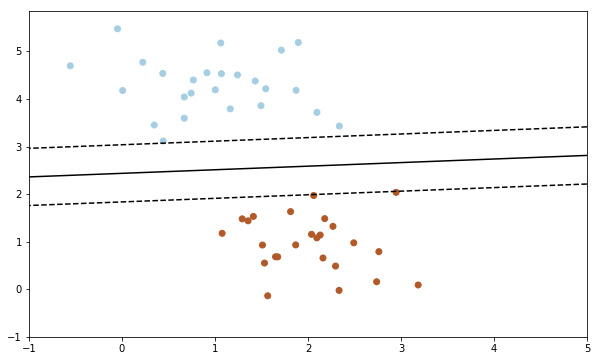

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, \
                    fit_intercept=True)
clf.fit(X, Y)

xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.figure(figsize=(10,6))

plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()